In [1]:
from transformers.utils import logging
logging.set_verbosity_error()

In [2]:
from transformers import CLIPModel

In [3]:
model = CLIPModel.from_pretrained(
    "openai/clip-vit-large-patch14")

In [4]:
from transformers import AutoProcessor

In [5]:
processor = AutoProcessor.from_pretrained(
    "openai/clip-vit-large-patch14")

In [6]:
from PIL import Image

In [7]:
image = Image.open("./pinksLeo.jpg")

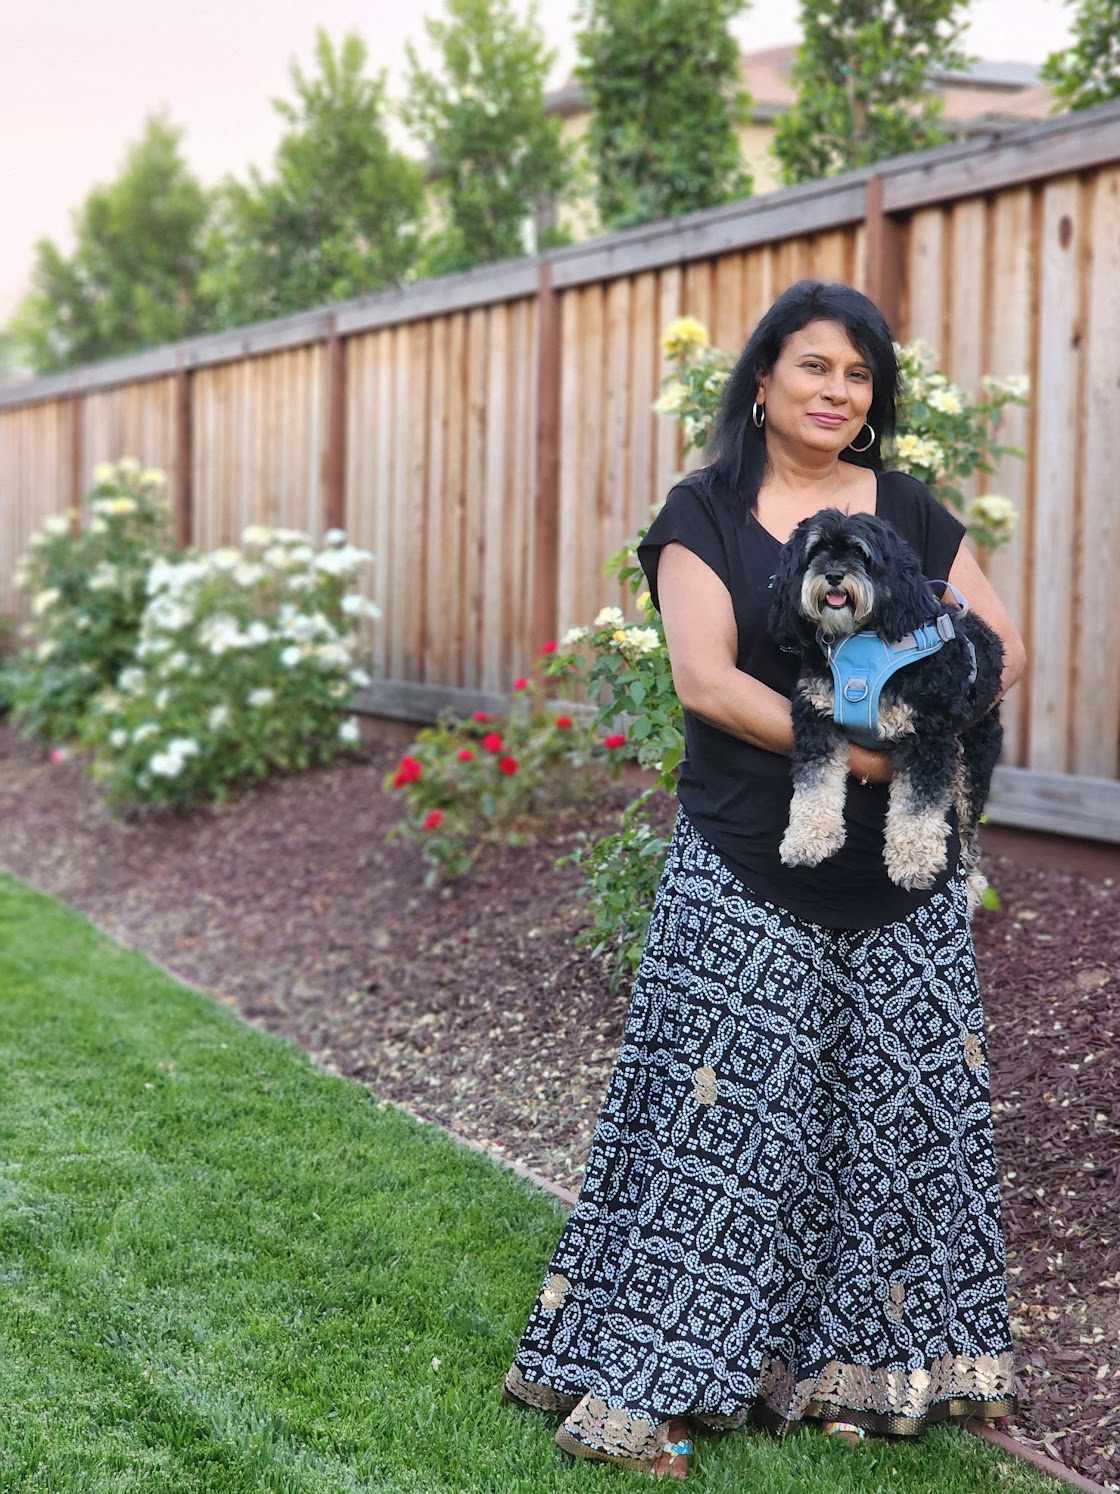

In [8]:
image

In [9]:
labels = ["a photo of a cat", "a photo of a dog"]

In [10]:
inputs = processor(text=labels,
                   images=image,
                   return_tensors="pt",
                   padding=True)

In [11]:
outputs = model(**inputs)

In [12]:
outputs

CLIPOutput(loss=None, logits_per_image=tensor([[11.2257, 16.6149]], grad_fn=<TBackward0>), logits_per_text=tensor([[11.2257],
        [16.6149]], grad_fn=<MulBackward0>), text_embeds=tensor([[-0.0031,  0.0028,  0.0291,  ...,  0.0227,  0.0088,  0.0132],
        [ 0.0091, -0.0039,  0.0203,  ...,  0.0310,  0.0025,  0.0109]],
       grad_fn=<DivBackward0>), image_embeds=tensor([[ 3.0814e-02, -5.1333e-03,  1.0828e-03,  2.4596e-02,  2.6719e-02,
         -8.0807e-03,  2.3249e-02,  2.4098e-02,  3.5454e-03, -2.2763e-02,
         -1.4793e-02,  2.5958e-02,  3.7393e-02, -1.9118e-02,  2.2311e-02,
          2.4524e-02,  2.3309e-02,  2.3197e-02, -1.9444e-02,  7.6698e-03,
         -1.0423e-02, -2.6496e-02,  3.6575e-03,  4.5029e-03, -6.7056e-03,
         -3.3558e-02,  4.3343e-03, -4.4790e-02, -1.8667e-03, -6.4236e-03,
         -3.4021e-02, -1.8353e-02, -2.2995e-02, -1.6399e-02, -2.2497e-03,
          6.0971e-02, -3.5739e-02, -1.0587e-02, -4.6699e-02,  4.4684e-02,
         -1.1358e-02,  4.7418e-03,  4.7

In [13]:
outputs.logits_per_image

tensor([[11.2257, 16.6149]], grad_fn=<TBackward0>)

In [14]:
probs = outputs.logits_per_image.softmax(dim=1)[0]

In [15]:
probs

tensor([0.0045, 0.9955], grad_fn=<SelectBackward0>)

In [16]:
probs = list(probs)
for i in range(len(labels)):
  print(f"label: {labels[i]} - probability of {probs[i].item():.4f}")

label: a photo of a cat - probability of 0.0045
label: a photo of a dog - probability of 0.9955
